## Link of the dataset

https://www.kaggle.com/datasets/tunguz/online-retail

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(r"E:\DS Diploma\jupyter notebooks\machine_learning\Online_Retail.csv", encoding='ISO-8859-1')

df.head()

C:\Users\karim\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### ☝️ Quantity & Unit Price of a product can't be Negative ! 

In [4]:
df.shape


(541909, 8)

### ☝️ This Dataset has 541,909 rows and 8 columns


In [5]:
# checking for duplicate values in the dataset

df.duplicated().sum()


5268

### ☝️ We have 5268 duplicate values in the dataset


In [6]:
# removing the duplicated values

df = df.drop_duplicates()

In [7]:
# unit price summary

df1 = df.copy()

unitprice_summary = df1['UnitPrice'].describe()
print(unitprice_summary)

count    536641.000000
mean          4.632656
std          97.233118
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


### ☝️ look at Min, Max and average of UnitPrice

In [8]:
quantity_summary_stats = df1['Quantity'].describe()
print(quantity_summary_stats)

count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


### ☝️ look at Min, Max and average of quantity

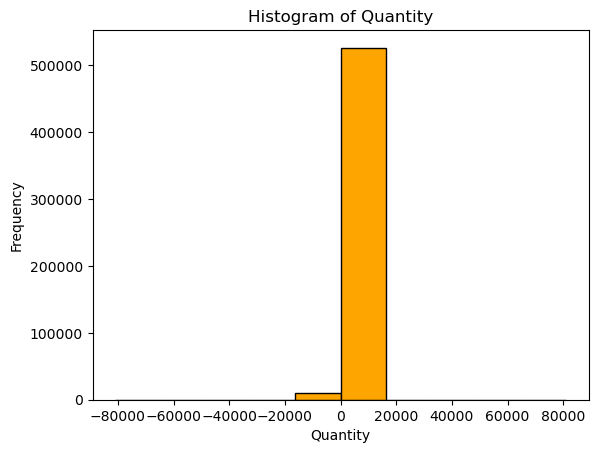

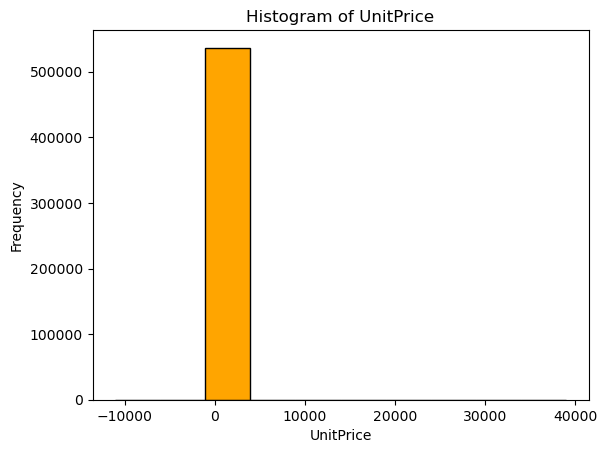

In [9]:
# Let's see how Quantity and UnitPrice is distributed

columns = ['Quantity','UnitPrice']

for column in columns:
    df[column].plot(kind='hist', edgecolor='k', color='orange')  
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [10]:
# Removing negative values from Quantities and UnitPrice column


df1=df1[(df1['Quantity']>0) & (df1['UnitPrice']>0)]


In [11]:
# Cancelled Invoices

df1['InvoiceNo'].apply(str).str.startswith('C').sum()

0

### ☝️ Once we have deleted the negative values from Quantites & UnitPrice, We don't have any cancelled invoices left


In [12]:
# SInce Customer ID has missing values and we filling those with "unknown" for now(Visualization).

df1['CustomerID'] = df1['CustomerID'].fillna('0')


In [13]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   Description  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   524878 non-null  object 
 7   Country      524878 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.0+ MB


### ☝️ Now we don't have any missing values in the dataset

In [14]:
# Count of Unique invoices 

print('Count of Unique invoices:',df1['InvoiceNo'].nunique())

Count of Unique invoices: 19960


In [15]:
# Count of Unique customers 

print('Count of Unique customers:',df1['CustomerID'].nunique())

Count of Unique customers: 4339


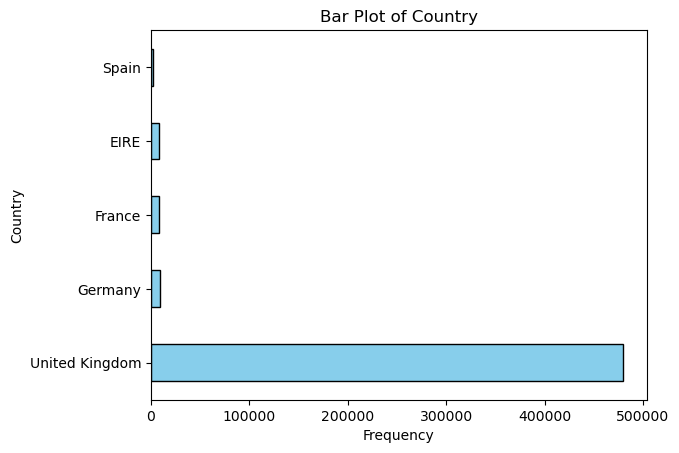

In [16]:
# Country frequency

df1['Country'].value_counts().head(5).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

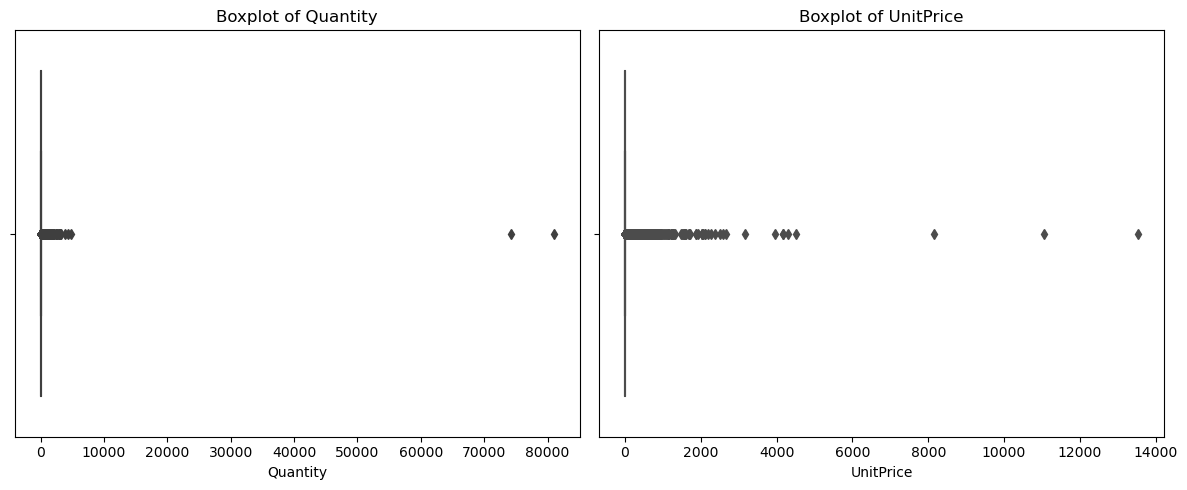

In [17]:
# Checking outliers in dataset

def plot_boxplots(data):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.boxplot(ax=axes[0], x=df1['Quantity'])
    axes[0].set_title('Boxplot of Quantity')
    
    sns.boxplot(ax=axes[1], x=df1['UnitPrice'], color='orange')
    axes[1].set_title('Boxplot of UnitPrice')
    
    plt.tight_layout()
    plt.show()


plot_boxplots(df1)

In [18]:
print('Dataset shape with outliers: ',df1.shape)

Dataset shape with outliers:  (524878, 8)


In [19]:
# Removing Outliers


q_low = df1["Quantity"].quantile(0.25) # Calculate percentiles
q_hi  = df1["Quantity"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df1=df1[~((df1['Quantity']<(q_low-1.5*IQR)) | (df1['Quantity']>(q_hi+1.5*IQR)))]

# Calculate percentiles
q_low = df1["UnitPrice"].quantile(0.25)
q_hi  = df1["UnitPrice"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df1=df1[~((df1['UnitPrice']<(q_low-1.5*IQR)) | (df1['UnitPrice']>(q_hi+1.5*IQR)))]

In [20]:
print('Dataset shape after removing outliers: ',df1.shape)


Dataset shape after removing outliers:  (460251, 8)


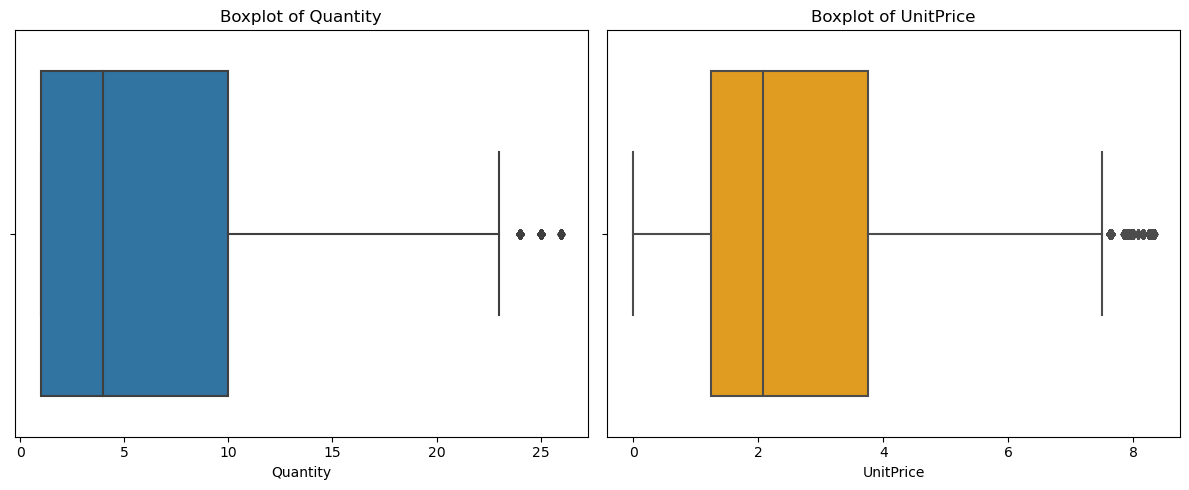

In [21]:
# box plot to visualize after removing the outliers

def plot_boxplots_after_removingoutliers(data):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.boxplot(ax=axes[0], x=df1['Quantity'])
    axes[0].set_title('Boxplot of Quantity')
    
    sns.boxplot(ax=axes[1], x=df1['UnitPrice'], color='orange')
    axes[1].set_title('Boxplot of UnitPrice')
    
    plt.tight_layout()
    plt.show()


plot_boxplots_after_removingoutliers(df1)

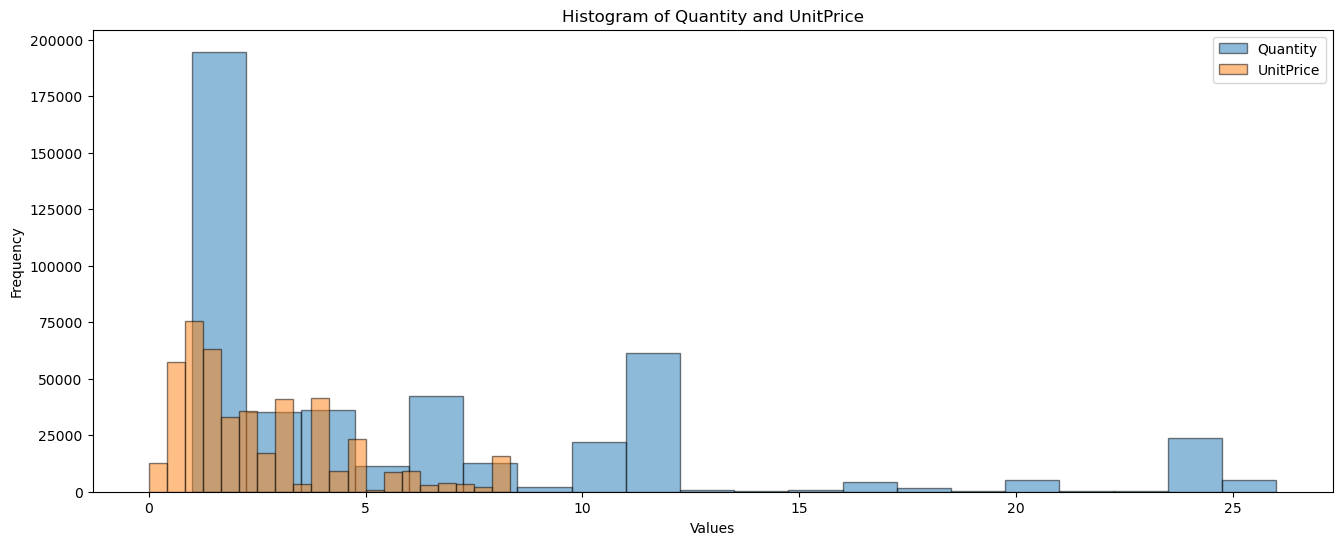

In [22]:
# Let's see how Quantity and UnitPrice is distibuted now

columns = ['Quantity', 'UnitPrice']

plt.figure(figsize=(16, 6))  

for column in columns:
    df1[column].plot(kind='hist', edgecolor='k', alpha=0.5, bins=20, label=column)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity and UnitPrice')
plt.legend()
plt.show()

In [23]:
# Splitting timestamp column into separate date and time columns.

df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month
df['Day'] = pd.to_datetime(df['InvoiceDate']).dt.day

df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time

C:\Users\karim\AppData\Local\Temp\ipykernel_16104\3680781992.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date
C:\Users\karim\AppData\Local\Temp\ipykernel_16104\3680781992.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month
C:\Users\karim\AppData\Local\Temp\ipykernel_16104\3680781992.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day'] = pd.to_datetime(df['InvoiceDate']).dt.day
C:\Users\karim\AppData\Local\Temp\ipykernel_16104\3680781992.py:7: UserWarni

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,2010-12-01,12,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010-12-01,12,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,2010-12-01,12,1,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010-12-01,12,1,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010-12-01,12,1,08:26:00


In [52]:
# bar plot to visualize Average Unit price by Year-Month 

plt.figure(figsize=(12, 6))
df1['YearMonth'] = df1['InvoiceDate'].dt.to_period('M')  # new column for Year-Month
avg_unitprice = df1.groupby('YearMonth')['UnitPrice'].mean()
avg_unitprice.plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price by Year-Month')
plt.xticks(rotation=45)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1200x600 with 0 Axes>

In [48]:
# area plot to visualize total invoice genrated by year-month

plt.figure(figsize=(12, 6))
df1['YearMonth'] = df1['InvoiceDate'].dt.to_period('M')  # new column for Year-Month
number_of_invoices_per_month = df1.groupby('YearMonth')['InvoiceNo'].count()
number_of_invoices_per_month.plot(kind='area', color='green', alpha=0.7)

plt.xlabel('Year-Month')
plt.ylabel('Number of Invoices')
plt.title('Total Invoices Generated by Year-Month')
plt.xticks(rotation=45)
plt.grid(True)  
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1200x600 with 0 Axes>

### ☝️ As we can see the most profitable month is 2011-11


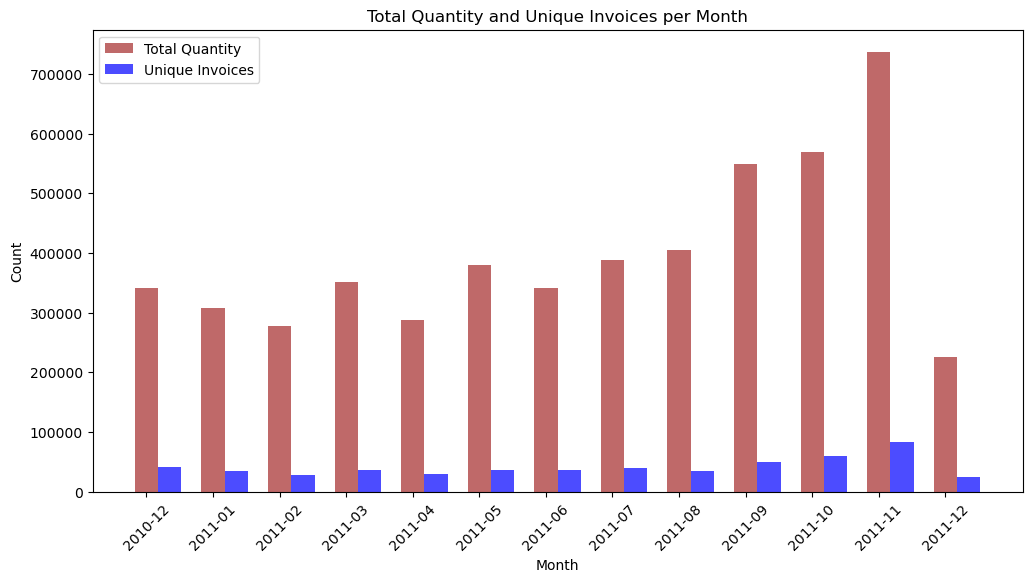

In [47]:
#* total quantity with unique invoice in a month


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by 'YearMonth' and sum the 'quantity' to get the total quantity per month
monthly_total_quantity = df.groupby('YearMonth')['Quantity'].sum()

# Count the unique invoices per month
monthly_unique_invoices = df.groupby('YearMonth')['InvoiceNo'].count()

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = monthly_total_quantity.index.astype(str)
x = range(len(index))

plt.bar(x, monthly_total_quantity, width=bar_width, label='Total Quantity', color='brown', alpha=0.7)
plt.bar([i + bar_width for i in x], monthly_unique_invoices, width=bar_width, label='Unique Invoices', color='blue', alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Quantity and Unique Invoices per Month')
plt.xticks(x, index, rotation=45)
plt.legend()
plt.show()

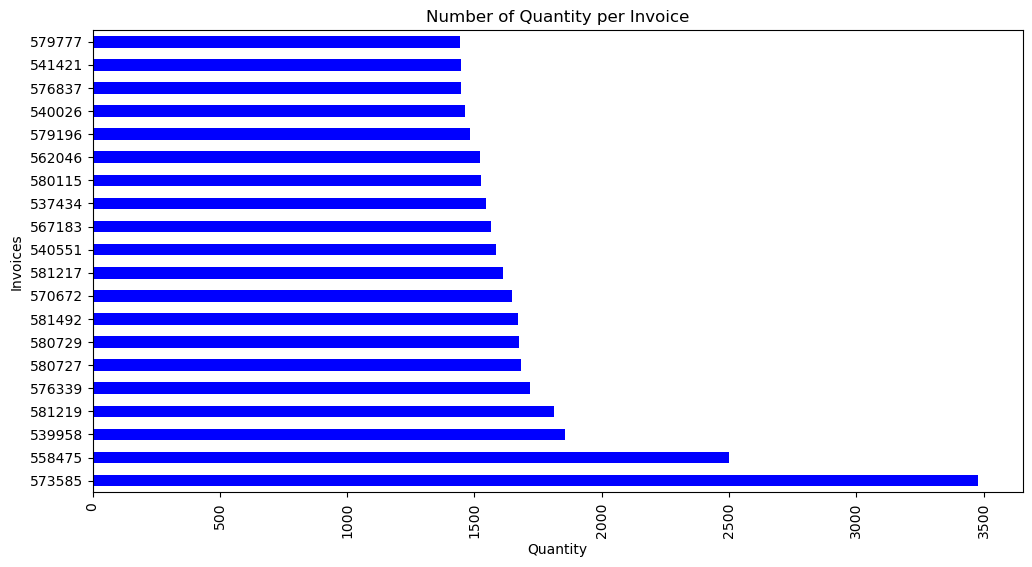

In [46]:
#* total quantity per invoice

plt.figure(figsize=(12, 6))
quantity_per_invoice_count = df1.groupby('InvoiceNo')['Quantity'].sum().nlargest(20)
quantity_per_invoice_count.plot(kind='barh', color='blue')
plt.xlabel('Quantity')
plt.ylabel('Invoices')
plt.title('Number of Quantity per Invoice')
plt.xticks(rotation=90)
plt.show()

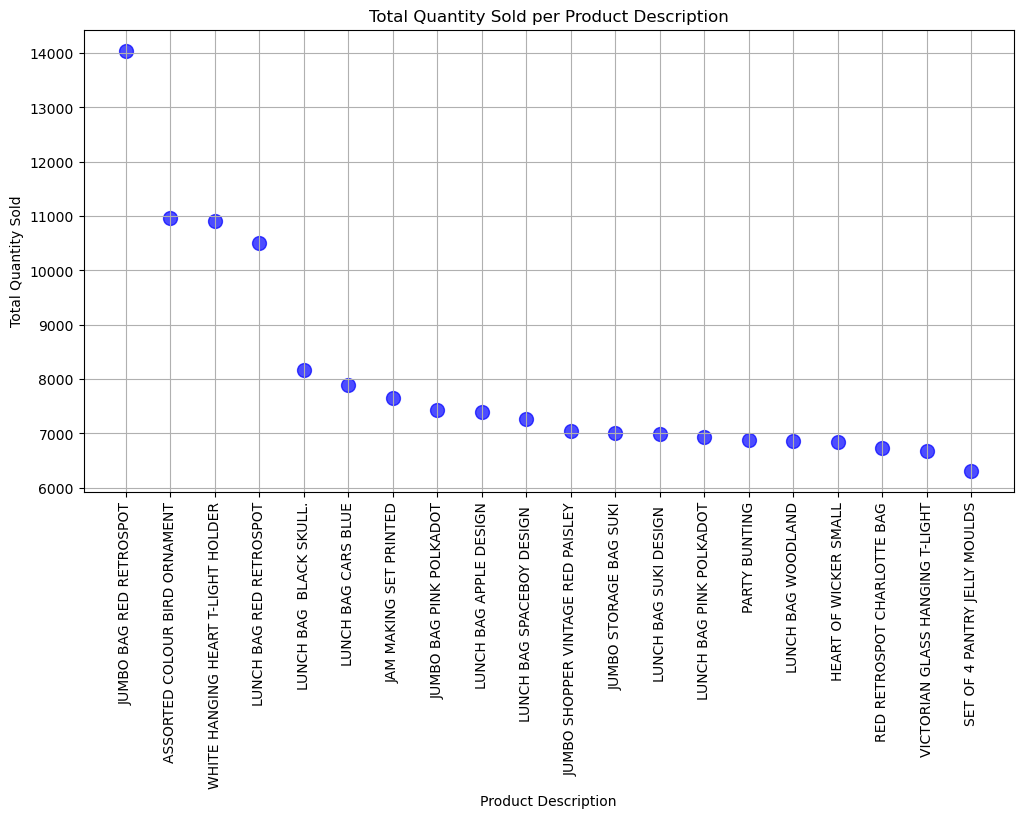

In [45]:
# scatter plot to visualize Number of Quantity sold per Product

plt.figure(figsize=(12, 6))
quantity_per_count = df1.groupby('Description')['Quantity'].sum().nlargest(20)
plt.scatter(quantity_per_count.index, quantity_per_count.values, color='blue', marker='o', s=100, alpha=0.7)

plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Product Description')
plt.xticks(rotation=90)
plt.grid(True)  
plt.show()

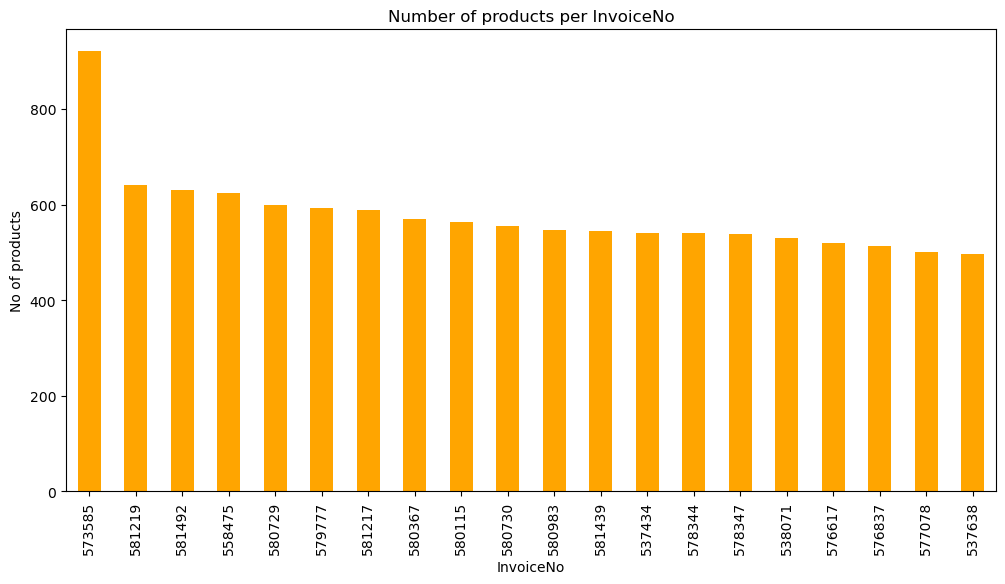

In [44]:
# bar plot to visualize Number of products per InvoiceNo

plt.figure(figsize=(12, 6))
customer_count = df1.groupby('InvoiceNo')['Description'].count().nlargest(20)
customer_count.plot(kind='bar', color='orange')
plt.xlabel('InvoiceNo')
plt.ylabel('No of products')
plt.title('Number of products per InvoiceNo')
plt.xticks(rotation=90)
plt.show()

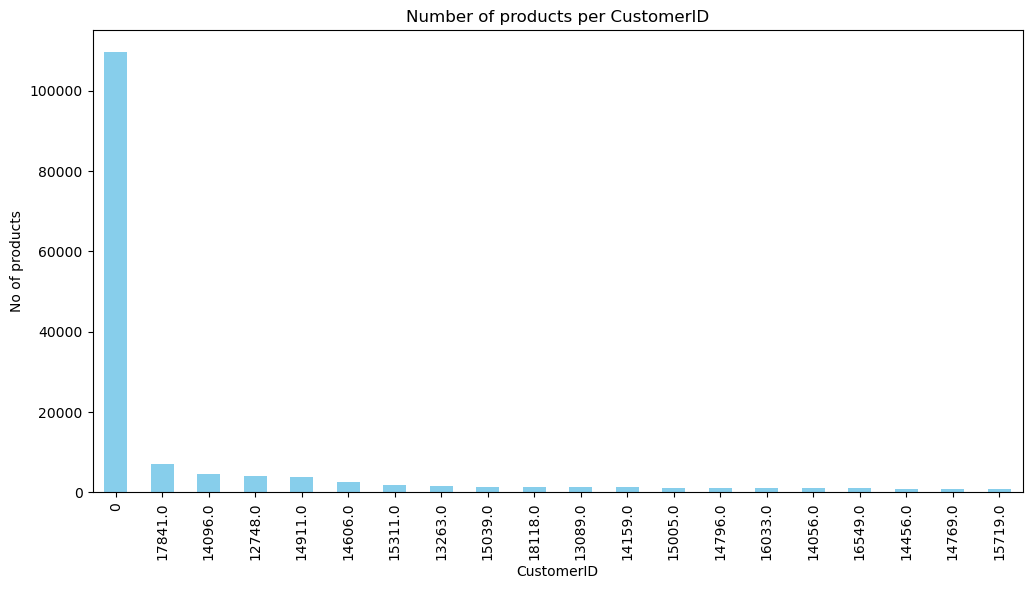

In [43]:
# bar plot to visualize Number of products per CustomerID

plt.figure(figsize=(12, 6))
product_count = df1.groupby('CustomerID')['Description'].count().nlargest(20)
product_count.plot(kind='bar', color='skyblue')
plt.xlabel('CustomerID')
plt.ylabel('No of products')
plt.title('Number of products per CustomerID')
plt.xticks(rotation=90)
plt.show()

### Note: Refer the "0" value as Unknown CustomerID

#### Top 20 CustomerID with highest number of product purchased

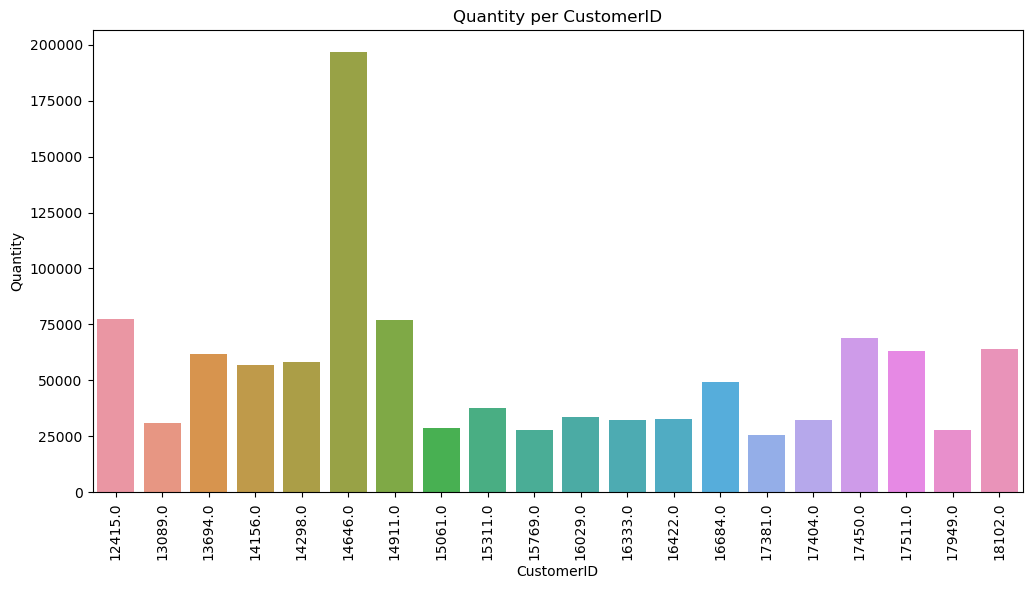

In [42]:
# bar plot to visualize Quantity per CustomerID

top_CustomerID_quantity = df.groupby('CustomerID')['Quantity'].sum().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_CustomerID_quantity.index, y=top_CustomerID_quantity.values)
plt.xticks(rotation=90)
plt.title("Quantity per CustomerID")
plt.xlabel("CustomerID")
plt.ylabel("Quantity")
plt.show()

## I hope that my project is easy to understand and you will like it 